# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="./Datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

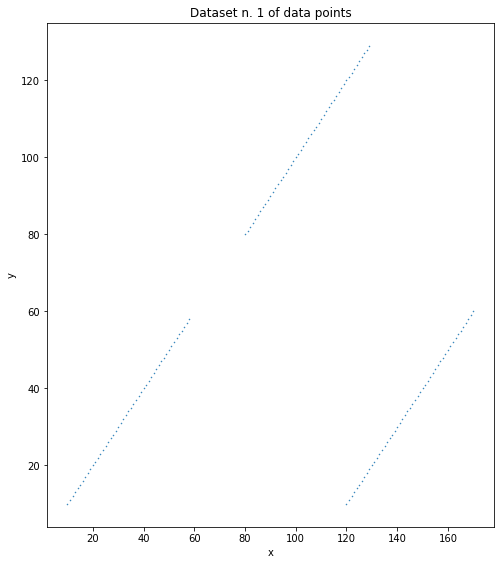

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

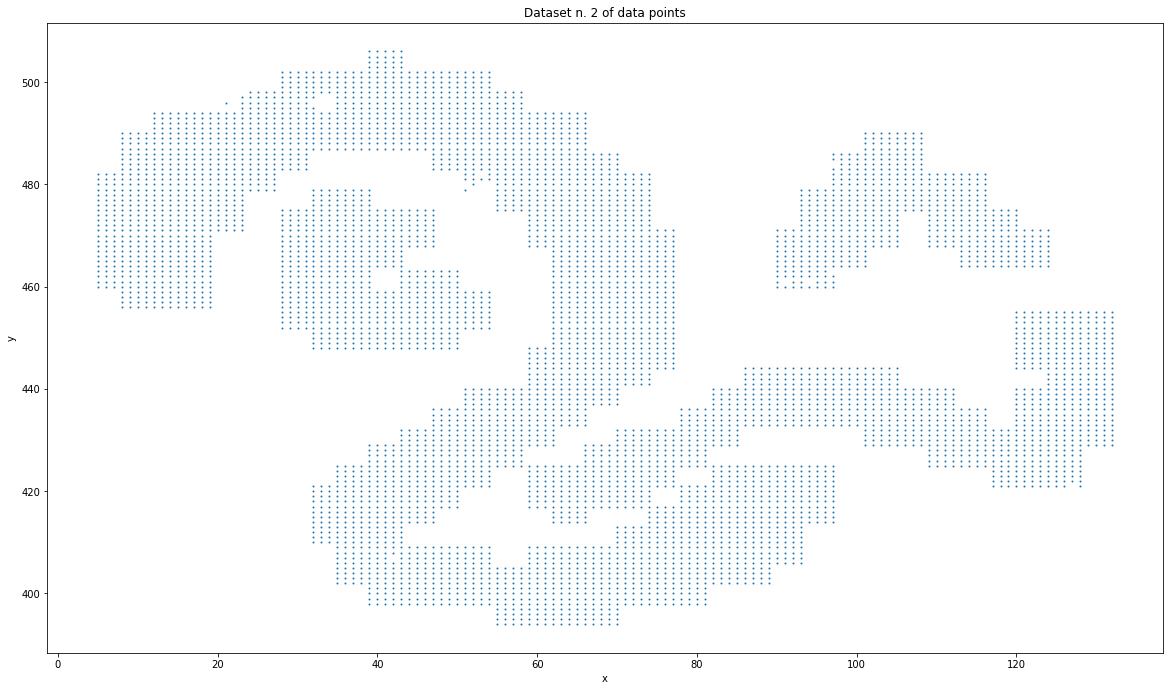

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

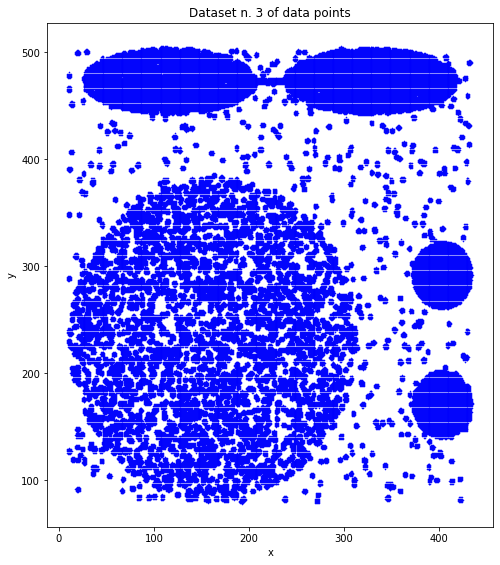

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./Datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

# i=0
# for i in range(n_samples1):
#     print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
#     print("in cluster n."+str(kmeans1.labels_[i]))
print("trained on dataset n. 1")

trained on dataset n. 1


In the following program we plot the clusters

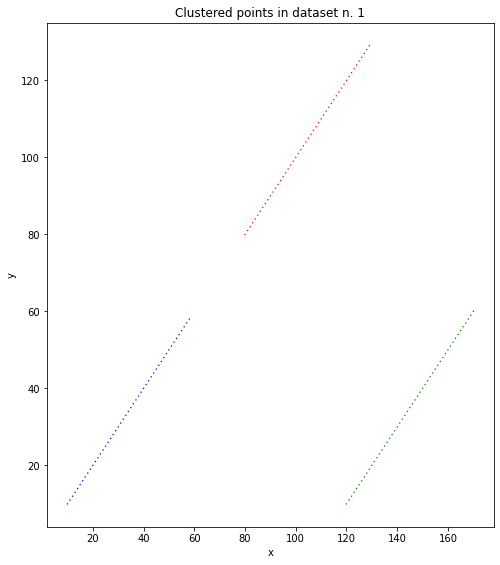

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=1)

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

In [7]:
# clustering with K-means on dataset n. 2
file_name2="dataset-DBSCAN.csv"
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)

np.random.seed(5)
k = 4
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)

# i=0
# for i in range(n_samples2):
#     print("Example n."+str(i)+"=("+str(data2[i,0])+","+str(data2[i,1])+")")
#     print("in cluster n."+str(kmeans2.labels_[i]))
print("trained on dataset n. 2")

trained on dataset n. 2


In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

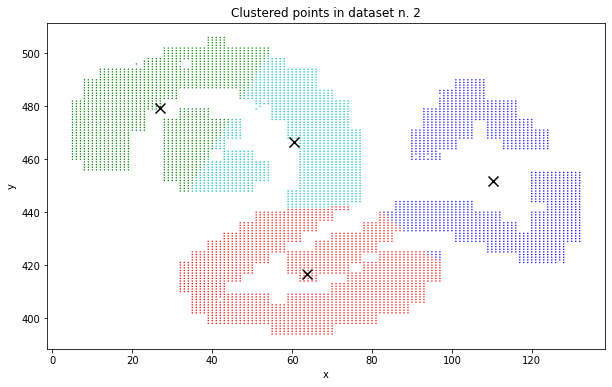

In [8]:
# plot the clustered points in dataset n. 2
plt.figure(figsize=(10,6))
plt.title('Clustered points in dataset n. 2')
plt.xlabel('x')
plt.ylabel('y')

#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu])
    # plot the centroids
    plt.scatter(kmeans2.cluster_centers_[clu,0], kmeans2.cluster_centers_[clu,1], s=100, c='black', marker='x')

plt.show()

As we can see in the plot above, the clusters are not well separated: k-means fails to recognize the clusters. This happens because the algorithm assigns each sample to the cluster with the smallest distance to the centroid of the cluster.

In the following cell I propose you to perform clustering with K-means on the dataset3.

In [9]:
# clustering with K-means on dataset n. 3
file_name3="CURE-complete.csv"
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

np.random.seed(5)
k = 5
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)

# i=0
# for i in range(n_samples3):
#     print("Example n."+str(i)+"=("+str(data3[i,0])+","+str(data3[i,1])+")")
#     print("in cluster n."+str(kmeans3.labels_[i]))
print("trained on dataset n. 3")

trained on dataset n. 3


In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

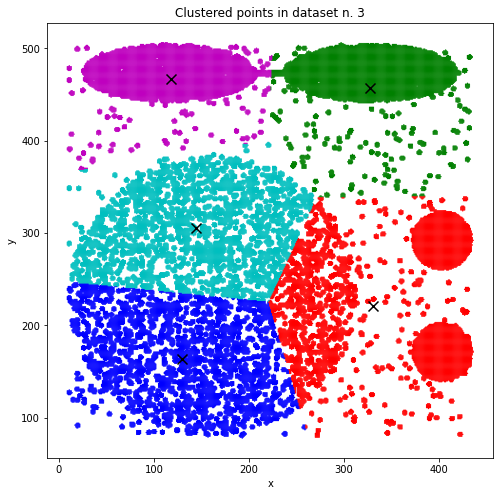

In [10]:
# plot the clustered points in dataset n. 3
plt.figure(figsize=(8,8))
plt.title('Clustered points in dataset n. 3')
plt.xlabel('x')
plt.ylabel('y')

#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu])
    # plot the centroids
    plt.scatter(kmeans3.cluster_centers_[clu,0], kmeans3.cluster_centers_[clu,1], s=100, c='black', marker='x')

plt.show()
    

Here the algorithm works quite well for the two upper clusters. As regards the other three clusters, due to the noisy points, k-means fails to recognize the real clusters.

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [22]:
# evaluate the performance of the clustering algorithm on the dataset n. 1
from sklearn.metrics import silhouette_score
import pandas as pd

def find_k(data, k_max=10):
    scores = pd.Series([], dtype=float)
    for k in np.arange(2, k_max + 1):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(data)
        labels = model.labels_
        score = silhouette_score(data, labels)
        scores[k] = score
    return scores.idxmax(), scores



As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

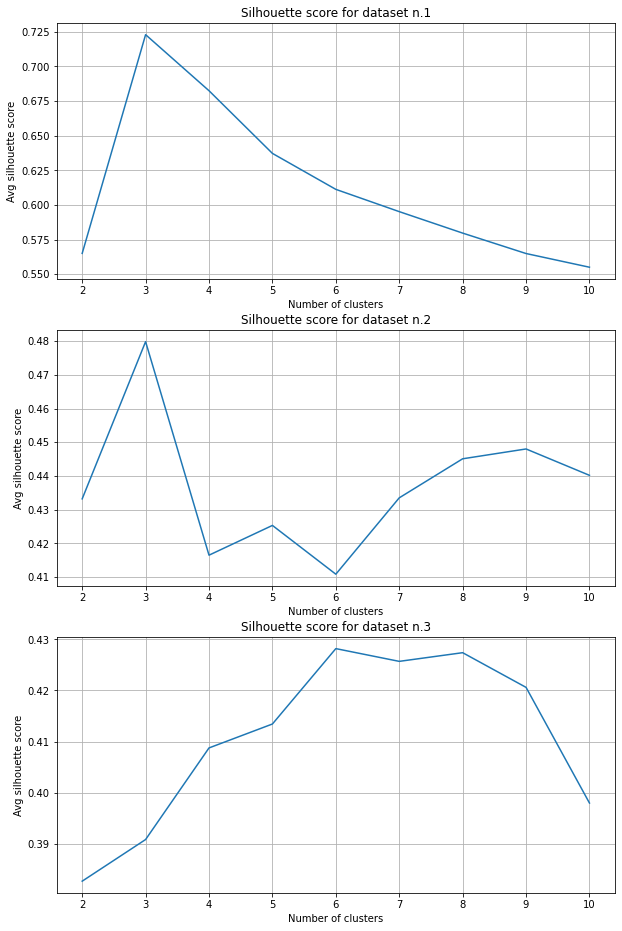

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,16))
i = 0
for ax, dataset in zip(axes, [data1, data2, data3]):
    i += 1
    # make tuning
    max_k, all_scores = find_k(dataset)
    # plot results
    ax.grid()
    ax.set_title(f'Silhouette score for dataset n.{i}')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Avg silhouette score')
    ax.plot(all_scores)

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.